In [294]:
import numpy as np
import pandas as pd

In [747]:
df=pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

In [748]:
first = datetime.date(2020, 1, 31)
leng =len(df)
date_ = [first + datetime.timedelta(days=x) for x in range(leng)]
Day = np.arange(1,(leng+1),1)
date_ = pd.to_datetime(date_,utc=None)
df["Date"] = date_
df["Day"] = Day
df0=df
v=len(df)-1
df=df.head(v)
df.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day
136,2020-06-15,11405,333043,7358,169685,324,9522,137
137,2020-06-16,10032,343075,10639,180324,396,9918,138
138,2020-06-17,11086,354161,7226,187550,2004,11922,139
139,2020-06-18,13108,367269,6890,194440,341,12263,140
140,2020-06-19,13829,381098,10741,205181,343,12606,141


In [749]:
#df = df.drop(['Date','Total Confirmed','Daily Recovered', 'Total Recovered','Daily Deceased','Daily Confirmed'], axis=1)

In [760]:
#df=df.tail(6)
df1=df.tail(11)
df2=df.tail(20)
df3=df.tail(10)

In [761]:
Y1 = np.log(df1['Total Confirmed'])
Y1 = np.array(Y1)
Y2 = np.log(df1['Total Recovered'])
Y2 = np.array(Y2)
Y3 = np.log(df1['Total Deceased'])
Y3 = np.array(Y3)
X1 = np.array(df1['Day'])
X2 = np.array(df2['Day'])
X = np.array(df3['Day'])
#Y4 = np.array(df2['Daily Confirmed'])
Y4 =np.log(df2['Daily Confirmed'])
Y4 = np.array(Y4)
Y5 =np.log(df2['Daily Recovered'])
Y5 = np.array(Y5)
Y6 =np.log(df2['Daily Deceased'])
Y6 = np.array(Y6)


In [762]:
from sklearn.linear_model import LinearRegression
X1=X1.reshape(-1, 1)
X2=X2.reshape(-1, 1)
Y1=Y1.reshape(-1, 1)
Y2=Y2.reshape(-1, 1)
Y3=Y3.reshape(-1, 1)
Y4=Y4.reshape(-1, 1)
Y5=Y5.reshape(-1, 1)
Y6=Y6.reshape(-1, 1)

reg1 = LinearRegression().fit(X1, Y1)
reg2 = LinearRegression().fit(X1, Y2)
reg3 = LinearRegression().fit(X1, Y3)
reg4 = LinearRegression().fit(X2, Y4)
reg5 = LinearRegression().fit(X2, Y5)
reg6 = LinearRegression().fit(X2, Y6)

logb1 = reg1.coef_
loga1 = reg1.intercept_
a1 = np.exp(loga1)
b1 = np.exp(logb1)

logb2 = reg2.coef_
loga2 = reg2.intercept_
a2 = np.exp(loga2)
b2 = np.exp(logb2)

logb3 = reg3.coef_
loga3 = reg3.intercept_
a3 = np.exp(loga3)
b3 = np.exp(logb3)

logb4 = reg4.coef_
loga4 = reg4.intercept_
a4 = np.exp(loga4)
b4 = np.exp(logb4)

logb5 = reg5.coef_
loga5 = reg5.intercept_
a5 = np.exp(loga5)
b5 = np.exp(logb5)

logb6 = reg6.coef_
loga6 = reg6.intercept_
a6 = np.exp(loga6)
b6 = np.exp(logb6)
#print("Based on Last 20 Days Data")
#print ("Total Confirmed Accuracy", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Confirmed", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Recovered ", reg2.score(X1, Y2)*100)
print ("coefficient of determination for Total Deceased ", reg3.score(X1, Y3)*100)
print("coefficient of determination for Based on Last 30 Days Data")
print ("coefficient of determination for Daily Confirmed ", reg4.score(X2, Y4)*100)
print ("coefficient of determination for Daily Recovered ", reg5.score(X2, Y5)*100)
print ("coefficient of determination for Daily Deceased ", reg6.score(X2, Y6)*100)

coefficient of determination for Total Confirmed 99.87755803530794
coefficient of determination for Total Recovered  99.88724225079815
coefficient of determination for Total Deceased  95.55730410085235
coefficient of determination for Based on Last 30 Days Data
coefficient of determination for Daily Confirmed  72.06936059301017
coefficient of determination for Daily Recovered  80.03678085649513
coefficient of determination for Daily Deceased  38.70095299013634


In [763]:
drange = 15
start =len(df) +1
dval = np.arange(start,start+drange,1)
dval= np.array(dval)
val= dval
dval=dval.reshape(-1, 1)
print(dval.shape)
import datetime
base = datetime.date.today() - datetime.timedelta(days=0)
date_list = [base + datetime.timedelta(days=x) for x in range(drange)]
date_list = pd.to_datetime(date_list,utc=None)

DConfirmed = np.round_(np.multiply(a4,(np.power(b4,val))))
TConfirmed = np.round_(np.multiply(a1,(np.power(b1,val))))
#TConfirmed = np.round_(reg1.predict(dval))
DRecovered = np.round_(np.multiply(a5,(np.power(b5,val))))
TRecovered = np.round_(np.multiply(a2,(np.power(b2,val))))
#TRecovered = np.round_(reg2.predict(dval))
DDeceased = np.round_(np.multiply(a6,(np.power(b6,val))))
TDeceased = np.round_(np.multiply(a3,(np.power(b3,val))))
#TDeceased = np.round_(reg3.predict(dval))

dict = {
   'Date' : date_list,
    #    'Daily Confirmed': DConfirmed.flatten(), 
        'Total Confirmed': TConfirmed.flatten(), 
  #      'Daily Recovered': DRecovered.flatten() ,
  #      'Total Recovered': TRecovered.flatten(),
 #       'Daily Deceased' : DDeceased.flatten(),
        'Total Deceased' : TDeceased.flatten(),
        'Day' : dval.flatten() ,
       } 
final = pd.DataFrame(dict) 


(15, 1)


In [764]:
df0.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day
137,2020-06-16,10032,343075,10639,180324,396,9918,138
138,2020-06-17,11086,354161,7226,187550,2004,11922,139
139,2020-06-18,13108,367269,6890,194440,341,12263,140
140,2020-06-19,13829,381098,10741,205181,343,12606,141
141,2020-06-20,14740,395838,9029,214210,365,12971,142


In [765]:
final.head()

,Date,Total Confirmed,Total Deceased,Day
0,2020-06-20,395769.0,13164.0,142
1,2020-06-21,410135.0,13900.0,143
2,2020-06-22,425022.0,14677.0,144
3,2020-06-23,440450.0,15497.0,145
4,2020-06-24,456437.0,16363.0,146


Text(0, 0.5, 'Total Confirmed')

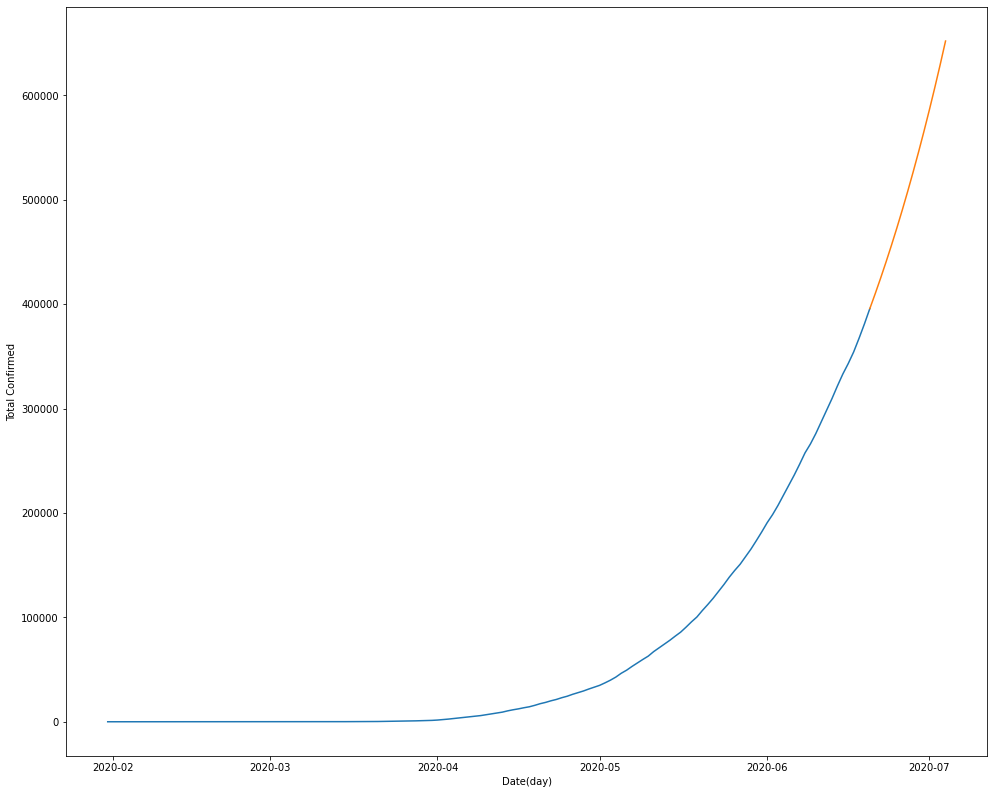

In [766]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(16,13))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df0['Date']
position =df0['Total Confirmed']

time1 = final['Date']
position1 = final['Total Confirmed']
axes.plot(time, position)
axes.plot(time1, position1)

plt.xlabel('Date(day)')
plt.ylabel('Total Confirmed')

In [768]:
#save to Csv
final.to_csv("predict.csv")
pr=pd.read_csv('predict.csv')
pr.head()

,Unnamed: 0,Date,Total Confirmed,Total Deceased,Day
0,0,2020-06-20,395769.0,13164.0,142
1,1,2020-06-21,410135.0,13900.0,143
2,2,2020-06-22,425022.0,14677.0,144
3,3,2020-06-23,440450.0,15497.0,145
4,4,2020-06-24,456437.0,16363.0,146
